In [1]:
import numpy as np
from ReferenceElement import *
from dg_functions_heat_equation import *
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
N = 8
K = 8
CF = 2.**(-7)
start = 0.
end = 2*np.pi
a = 1.
alpha = 1.
h = (end-start)/K


reference_element = ReferenceElement(N)
reference_interval = reference_element[0]
M_inv = reference_element[1]*2/h
M_inv_S = reference_element[2]*2/h

x = get_x_elements(start,end, K, reference_interval)
dx_min = get_dx_min(x)
dt = CF*dx_min

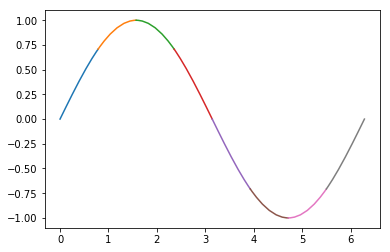

In [3]:
t = 0
def u_ana(x,t):
    return np.exp(-t)*np.sin(x)
u = u_ana(x,t)
for i in range(len(u)):
    plt.plot(x[i],u[i])

In [4]:
q = DG_q_elements(u, K,N, t,a,alpha, M_inv, M_inv_S)

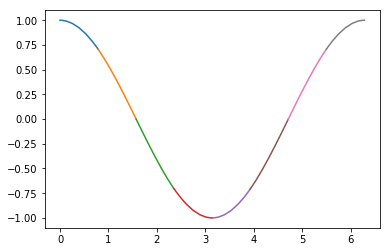

In [5]:
for i in range(len(u)):
    plt.plot(x[i],q[i])

In [6]:
t = 0.
u = u_ana(x,t)
q = DG_q_elements(u, K,N, t,a,alpha, M_inv, M_inv_S)
t_target = 1.
nt = int((t_target-t)/dt)
print(nt)

3251


In [7]:
for n in range(nt):
    u = RK4_Step(dt, DG_du_dt, u, K, N,t,a,alpha, M_inv, M_inv_S, q)
    q = DG_q_elements(u, K,N, t,a,alpha, M_inv, M_inv_S)
    t += dt
print(t)

0.9998080482751847


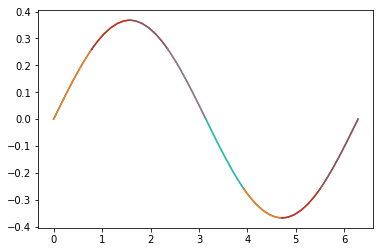

In [10]:
for i in range(len(u)):
    plt.plot(x[i],u[i])
    plt.plot(x[i],u_ana(x,t)[i])

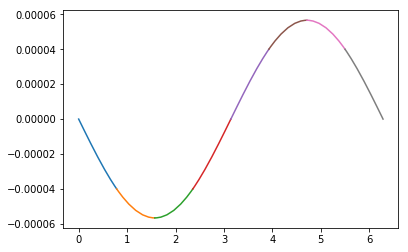

In [11]:
for i in range(len(u)):
    plt.plot(x[i],u[i]-u_ana(x,t)[i])
